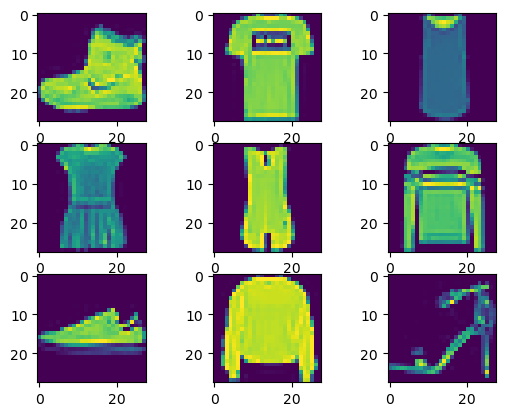

angle -2
angle 0
(2, 60000, 28, 28)
[9 0 0 ... 3 0 5]
(180000,)
[[816   2  19  48   5   2  97   0  11   0]
 [  3 961   3  24   4   0   4   0   1   0]
 [ 19   5 732  12 127   1  93   0  11   0]
 [ 34  10  13 868  25   0  44   0   6   0]
 [  0   1 106  35 759   1  88   0  10   0]
 [  0   0   0   1   0 926   0  51   4  18]
 [142   2 122  37 110   1 562   0  24   0]
 [  0   0   0   0   0  33   0 939   1  27]
 [  6   1   6  11   4   4  20   5 943   0]
 [  0   0   0   0   0  14   0  45   2 939]]
Accuracy: 0.8445


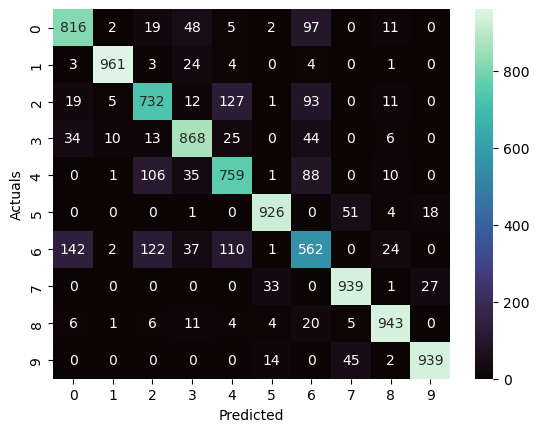

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from scipy.ndimage import rotate

# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Plot first few images
for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(x_train[i])
# Show the figure
plt.show()

# Assuming c_x_train is the original dataset and y_train is the original label array
rotated_images = []

# Generate rotated images and store them in the rotated_images list
for angle in range(-2, 2, 2):
    print('angle', angle)
    rotated_images.append(rotate(x_train, angle, axes=(1, 2), reshape=False))

# Convert the rotated_images list to a numpy array
rotated_images = np.array(rotated_images)
print(rotated_images.shape)
# Concatenate the original dataset with the rotated images array
x_train = np.concatenate([x_train] + list(rotated_images))

# Calculate the number of rotated images
num_rotated_images = rotated_images.shape[0]
# Repeat the original label array num_rotated_images times
y_train_rotated = np.concatenate([y_train] * num_rotated_images)
print(y_train_rotated)
# Concatenate the original label array with the repeated label array
y_train = np.concatenate([y_train, y_train_rotated])
print(y_train.shape)

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=2.0)
# m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=1.0)
m_logisitic_reg.fit(x_train, y_train)

# Predict the test data.
y_test_pred = m_logisitic_reg.predict(x_test)

cm1 = confusion_matrix(y_test, y_test_pred)
print(cm1)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm1, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

labels = ['Tees','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boots']
